# Linear Regression Algebra

In the second Module [CompMech02-Analyze-Data](../module_02/README), you
imported data from the [NOAA](https://www.ncdc.noaa.gov/cag/) (National
Oceanic and Atmospheric Administration) youbpage. Then, you did a
piece-wise linear regression fit, but the lines youre disconnected. In
this notebook, you will look at __general linear regression__, which is
framing the our __least-sum-of-squares error__ as a linear algebra
problem.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Polynomials

In general, you may want to fit other polynomials besides degree-1
(straight-lines). You used the `numpy.polyfit` to accomplish this task
before
[[1]](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html). 

$y=a_{0}+a_{1}x+a_{2}x^{2}+\cdots+a_{m}x^{m}+e$

Now, the solution for $a_{0},~a_{1},...a_{m}$ is the minimization of m+1-dependent linear equations. 

Consider the following data:

| x | y |
|---|---|
| 0.00 | 21.50 |
| 2.00 | 20.84 |
| 4.00 | 23.19 |
| 6.00 | 22.69 |
| 8.00 | 30.27 |
| 10.00 | 40.11 |
| 12.00 | 43.31 |
| 14.00 | 54.79 |
| 16.00 | 70.88 |
| 18.00 | 89.48 |

Text(0, 0.5, 'y')

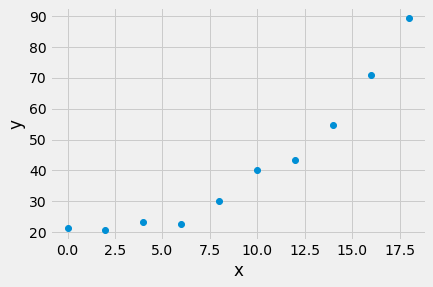

In [26]:
xy_data = np.loadtxt('../data/xy_data.csv',delimiter=',')
x=xy_data[:,0];
y=xy_data[:,1];
plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')

A general polynomial decription of our function, $f(\mathbf{x}),~and~\mathbf{y}$ is that you have $m+1$ unknown coefficients, where $m$ is the degree of the polynomial, and $n$ independent equations. In the example framed below, you are choosing a second-order polnomial fit. 

$\mathbf{y}=\mathbf{x}^0 a_0+\mathbf{x}^1 a_1+\mathbf{x}^2 a_2+\mathbf{e}$

$\mathbf{y}=\left[\mathbf{Z}\right]\mathbf{a}+\mathbf{e}$

where $\mathbf{a}=\left[\begin{array}{c}
        a_{0}\\
        a_{1}\\
        a_{2}\end{array}\right]$

$\mathbf{y}=\left[\begin{array} 
 1y_{1}  \\
 y_{2}  \\
 y_{3}  \\
 y_{4}  \\
 y_{5}  \\
 y_{6}  \\
 y_{7}  \\
 y_{8}  \\
 y_{9}  \\
 y_{10} \end{array}\right]$
$~~~~[\mathbf{Z}]=\left[\begin{array} 
11 & x_{1} & x_{1}^{2} \\
1 & x_{2} & x_{2}^{2} \\
1 & x_{3} & x_{3}^{2} \\
1 & x_{4} & x_{4}^{2} \\
1 & x_{5} & x_{5}^{2} \\
1 & x_{6} & x_{6}^{2} \\
1 & x_{7} & x_{7}^{2} \\
1 & x_{8} & x_{8}^{2} \\
1 & x_{9} & x_{9}^{2} \\
1 & x_{10} & x_{10}^{2} \end{array}\right]$

The sum of squares residuals for this model is formed by solving for $\mathbf{e}$, then summing the square of the elements

$\mathbf{e} = \mathbf{y}-\mathbf{Za}$

$S_{r}=\sum_{i=1}^{n}\left(y_{i}-\sum_{j=0}^{m}a_{j}z_{ji}\right)^2$

Minimizing this function, $S_r$ results in the following set of linear equations, 

$\mathbf{y}=[\mathbf{Z}]\mathbf{a}$

->**A standard Linear Algebra Problem**

*the vector a is unknown, and Z is calculated based upon the assumed function*

In [32]:
Z=np.block([[x**2],[x],[x**0]]).T

Z

array([[  0.,   0.,   1.],
       [  4.,   2.,   1.],
       [ 16.,   4.,   1.],
       [ 36.,   6.,   1.],
       [ 64.,   8.,   1.],
       [100.,  10.,   1.],
       [144.,  12.,   1.],
       [196.,  14.,   1.],
       [256.,  16.,   1.],
       [324.,  18.,   1.]])

Try to solve the problem using the built-in `np.linalg.solve` function. 

```python
>>> np.linalg.solve(Z,y)

---------------------------------------------------------------------------
LinAlgError                               Traceback (most recent call last)
<ipython-input-4-7141fd6fdc3e> in <module>
----> 1 np.linalg.solve(Z,y)

<__array_function__ internals> in solve(*args, **kwargs)

~/.conda/envs/work/lib/python3.9/site-packages/numpy/linalg/linalg.py in solve(a, b)
    378     a, _ = _makearray(a)
    379     _assert_stacked_2d(a)
--> 380     _assert_stacked_square(a)
    381     b, wrap = _makearray(b)
    382     t, result_t = _commonType(a, b)

~/.conda/envs/work/lib/python3.9/site-packages/numpy/linalg/linalg.py in _assert_stacked_square(*arrays)
    201         m, n = a.shape[-2:]
    202         if m != n:
--> 203             raise LinAlgError('Last 2 dimensions of the array must be square')
    204 
    205 def _assert_finite(*arrays):

LinAlgError: Last 2 dimensions of the array must be square
```

### Reframe the least-square problem

The solving routines that you have used (`linalg.solve` and __Gauss elimination__) all require a square matrix, so an $m\times m$ matrix. For $m$ unknowns, there should be $m$ equations. Let's revisit the least squares regression description

$~~\mathbf{y}~~~~~=~~[\mathbf{Z}]~~~~~~\mathbf{a}$

$[n\times 1]~ [n\times m][m\times 1]$

or for the second-order polynomial and 10 x- and y-points, 

$~~\mathbf{y}~~~~~=~~[\mathbf{Z}]~~~~~~\mathbf{a}$

$[10\times 1]~ [10\times 3][3\times 1]$

One way to make any matrix square is to multiply the matrix by its transpose, $Z^T Z$ is $[3\times 10][10 \times 3]=[3 \times 3]$

$~~~~~~~~~~~\mathbf{Z^Ty}~~~~~~~=~~~~~~~~[\mathbf{Z^T Z}]~~~~~~~~~~~\mathbf{a}$

$|[3\times 10][10\times 1]|~ |[3\times 10][10\times 3]|[3\times 1]$

Our final least squares linear regression is as follows

$\mathbf{Z^Ty}=[\mathbf{Z^T Z}]\mathbf{a}$

which is a $[3\times 1]=[3 \times 3][3 \times 1]$, set of equations. 
```

```{code-cell} ipython3
a = np.linalg.solve(Z.T@Z,Z.T@y)
a
```

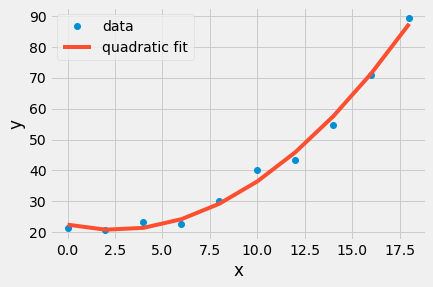

In [36]:
x_fcn=np.linspace(min(x),max(x));
plt.plot(x,y,'o',label='data')
plt.plot(x,Z@a,label='quadratic fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

### Exercise

The quadratic curve plotted should be smooth, but matplotlib connected each (x,y)-location provided with straight lines. Plot the quadratic fit with 50 x-data points to make it smooth.

## General Coefficient of Determination

The __coefficient of determination__ is a measure of how much the standard deviation is due to random error when the data is fit to a function. You make the assumption that the data has some underlying correlation in the form of a function $\mathbf{y}=f(\mathbf{x})$. So if you subtract the measured $\mathbf{y}-f(\mathbf{x})$ the result should be random error associated with noise [4]. 

The general coefficient of determination is defined as $r^2$, 

$r^{2}=\frac{S_{t}-S_{r}}{S_{t}}=1-\frac{S_{r}}{S_t}$

where $r$ is the correlation coefficient, $S_t$ is the standard deviation of the measured $\mathbf{y}$, and $S_r$ is the standard deviation of the __residuals__, $\mathbf{e} = \mathbf{y}-f(\mathbf{x}) = \mathbf{y}-\mathbf{Za}$.

In [39]:
St=np.std(y)
Sr=np.std(y-Z@a)

In [40]:
r2=1-Sr/St;
r=np.sqrt(r2);

print('the coefficient of determination for this fit is {}'.format(r2))
print('the correlation coefficient this fit is {}'.format(r))

the coefficient of determination for this fit is 0.9111905603853598
the correlation coefficient this fit is 0.954563020646285


### Discussion

What is the highest possible coefficient of determination? If its maximized, is that a _good_ thing?

### Exercise

Compare the coefficient of determination for a straight line _(you have to do a fit)_ to the quadratic fit _(done above)_. Which one is a better fit?

## Overfitting Warning 
**Coefficient of determination reduction does not always mean a better fit**

You will always increase the coefficient of determination and decrease the total sum of squares error by adding more terms to your function. This is called __overfitting__ your data. It is especially evident in polynomial fits, because they can behave unpredictably with higher order terms. 

## Nanonindentation data engineering model vs higher-order fit

Now, use experimental data from some [atomic force microscope nanoindentation of $MoS_2$ [2]](https://pdfs.semanticscholar.org/68c4/0c4eef562e2ac785fb7b4bcd6ee8229f2424.pdf). One of the nanoidentation experimental data files is in the data folder (`../data/mos2_afm.csv`). 

The experiment pushes an AFM tip into the center of a hole covered with
a single layer of $MoS_2$, 0.6-nm thick. A diagram is shown below. 

<img src="https://github.com/cooperrc/computational-mechanics/blob/master/images/afm_mos2.png?raw=true" style="width: 300px;"/> 

As the center of a thin sheet of $MoS_2$ is pushed downwards the tension increases, resulting in higher measured force. An engineering equation for this increase in force is as such

$F = A\delta + B \delta^3$

where $\delta$ is the deflection of the sheet (z in the data), $A=\pi\sigma_0t$,  $B=1.09Et/r^2$, $\sigma_0$ is the prestress in the sheet, $E$ is the Young's modulus, $t=0.6~nm$ is the thickness, and $r=260~nm$ is the radius of the sheet (they youre designed to be 250 nm, but there is some variation in microfabrication).

In [8]:
! head ../data/mos2_afm.csv

Z (nm),F (nN)
0,0
-0.011669,0.9
-0.0058346,0.45
0.3075,-1.35
0.29583,-0.45
0.5725,1.35
0.57833,0.9
0.5607,2.26
0.85666,1.8


### Build a statistical model with Python's Statsmodel

In the first Linear regression example in linear algebra, you built the $\mathbf{Z}$ matrix and set up the least squares problem in the form

$\mathbf{Z}^T\mathbf{ZA} = \mathbf{Z}^T\mathbf{y}$.

Now, try using the [`statsmodel.ols`](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html) ordinary least squares statistical model solution. You use `ols` in two steps

1. build the model with the function and the measurements, $\mathbf{Z}~and~\mathbf{y}$
2. use the `fit` function to get statistical information about your best-fit model

In [110]:
import statsmodels.api as sm

mos2 = np.loadtxt('../data/mos2_afm.csv',delimiter=',',skiprows=1)
d = mos2[:,0] # deflection data
F = mos2[:,1] # force data
Z = d[:, np.newaxis]**[3, 1]
y = F

model = sm.OLS(y, Z)

Now, you have a variable, `model`, that contains the measured values of force and assumed function, $F=A_0 \delta^3 + A_1 \delta^1$. Save the statistical output in the variable `results`. The `statsmodel` fit contains _a lot_ of information. For now, look at two of the outputs

1. `results.params`: the coefficients $A_0~and~A_1$
1. `results.summary`: a statistical report on the best-fit model including
    - standard error of coefficients, **std error**
    - coefficient of determination **R-squared**

coeffictients are A0 = 0.0018921394737263877, A1 = 1.5811965217538113
Statsmodel summary of model


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.496e+05
Date:                Wed, 17 Nov 2021   Prob (F-statistic):                        0.00
Time:                        11:55:17   Log-Likelihood:                         -1227.5
No. Observations:                 460   AIC:                                      2459.
Df Residuals:                     458   BIC:                                      2467.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0019   7.29e-06    259.384      0.000       0.002       0.002
x2             1.5812      0.013    117.560      0.000       1.555       1.608
==============================================================================
Omnibus:                      137.172   Durbin-Watson:                   0.373
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.686
Skew:                          -1.235   Prob(JB):                    1.12e-137
Kurtosis:                       8.177   Cond. No.                     4.72e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

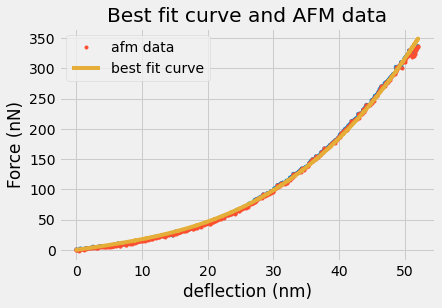

In [112]:
results = model.fit()
A = results.params
print('coeffictients are A0 = {}, A1 = {}'.format(*A))
print('Statsmodel summary of model')
plt.plot(d, F)
plt.plot(d,F,'.',label='afm data')
plt.plot(d,Z@results.params,label='best fit curve')
plt.title('Best fit curve and AFM data')
plt.xlabel('deflection (nm)')
plt.ylabel('Force (nN)')
plt.legend();
results.summary()

In [114]:
results?

Type:            RegressionResultsWrapper
String form:     <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f9df1c66370>
File:            ~/.conda/envs/work/lib/python3.9/site-packages/statsmodels/regression/linear_model.py
Docstring:      
Results class for for an OLS model.

Parameters
----------
model : RegressionModel
    The regression model instance.
params : ndarray
    The estimated parameters.
normalized_cov_params : ndarray
    The normalized covariance parameters.
scale : float
    The estimated scale of the residuals.
cov_type : str
    The covariance estimator used in the results.
cov_kwds : dict
    Additional keywords used in the covariance specification.
use_t : bool
    Flag indicating to use the Student's t in inference.
**kwargs
    Additional keyword arguments used to initialize the results.

See Also
--------
RegressionResults
    Results store for WLS and GLW models.

Notes
-----
Most of the methods and attributes are inherited from Regre

In [69]:
print('Youngs modulus from fit = {:.0f} GPa'.format(A[0]/1.09/0.61*260**2))
print('Youngs modulus reported = 210 GPa')

Youngs modulus from fit = 192 GPa
Youngs modulus reported = 210 GPa
----------------
the coefficient of determination for this fit is 0.967
the correlation coefficient this fit is 0.983


## Higher order fitting

Since, you have lots of data you can use as large of a polynomial fit as you want too, so let's also fit higher order polynomials and see if you can get a better function for force-vs-deflection, $F(\delta)$. First, you will separate the data into __training__ and __testing__ datasets [5]. 

* The __training__ data set will be used to fit our model to our data
* The __testing__ data will be left out of the fit to test how youll our model predicts data that was not included in a fit
* You will choose these points at random with an 70%-30% split __train-test__

In [131]:
# randomize testing/training indices
i_rand = np.arange(len(d))
np.random.shuffle(i_rand)

In [132]:
# choose the first half of data as training
train_per=0.7
d_train=d[i_rand[:int(len(d)*train_per)]]
F_train=F[i_rand[:int(len(d)*train_per)]]

# choose the second half of data as testing
d_test=d[i_rand[int(len(d)*train_per):]]
F_test=F[i_rand[int(len(d)*train_per):]]

In [133]:
d_train[:, np.newaxis]**[i for i in range(3, -1, -1)]

array([[2.94819764e+03, 2.05606921e+02, 1.43390000e+01, 1.00000000e+00],
       [1.20931121e+03, 1.13507716e+02, 1.06540000e+01, 1.00000000e+00],
       [4.82937995e+03, 2.85711409e+02, 1.69030000e+01, 1.00000000e+00],
       ...,
       [1.65686253e+02, 3.01664578e+01, 5.49240000e+00, 1.00000000e+00],
       [1.37531924e+05, 2.66441792e+03, 5.16180000e+01, 1.00000000e+00],
       [9.39295651e+04, 2.06633885e+03, 4.54570000e+01, 1.00000000e+00]])

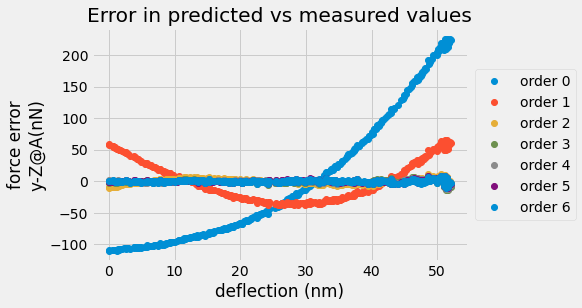

In [134]:
max_N=11
SSE_train=np.zeros(max_N)
SSE_test=np.zeros(max_N)
for i in range(0,max_N):
    Z_train = d_train[:, np.newaxis]**[n for n in range(i, -1, -1)]
    Z_test = d_test[:, np.newaxis]**[n for n in range(i, -1, -1)]
    model = sm.OLS(F_train, Z_train)
    results = model.fit()
    A = results.params
    if (i) <=6 or i==29: plt.plot(d_train,F_train-Z_train@A,'o',label='order {:d}'.format(i))
    SSE_train[i]=np.sum((F_train-Z_train@A)**2)/len(F_train)
    SSE_test[i]=np.sum((F_test-Z_test@A)**2)/len(F_test)
    
#plt.plot(d,F)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title('Error in predicted vs measured values')
plt.xlabel('deflection (nm)')
plt.ylabel('force error\ny-Z@A(nN)');

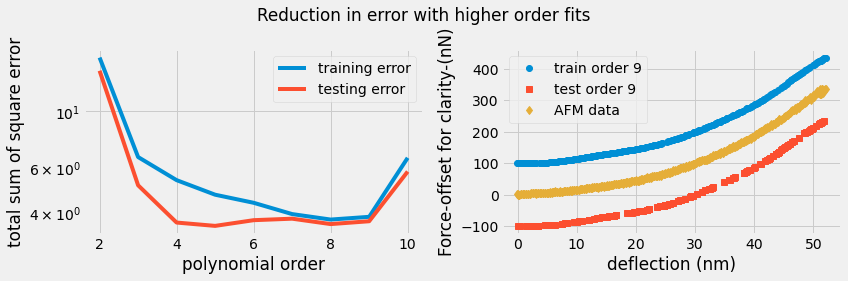

In [135]:
f, (ax1,ax2)=plt.subplots(1,2,figsize=(12,4),tight_layout=True)
ax1.semilogy(np.arange(2,max_N),SSE_train[2:],label='training error')
ax1.semilogy(np.arange(2,max_N),SSE_test[2:],label='testing error')
f.suptitle('Reduction in error with higher order fits')
ax1.legend();
ax1.set_xlabel('polynomial order')
ax1.set_ylabel('total sum of square error');
ax2.plot(d_train,Z_train@A+100,'o',label='train order {:d}'.format(i-1))
ax2.plot(d_test,Z_test@A-100,'s',label='test order {:d}'.format(i-1))
ax2.plot(d,F,'d',label='AFM data')
ax2.legend();
ax2.set_ylabel('Force-offset for clarity-(nN)')
ax2.set_xlabel('deflection (nm)');

## Training-testing curve

Looking at the total error plot on the left, each time you increase the order of the polynomial, the error decreases between the model and the __training__ data, but the __testing__ data error starts to increase after the polynomial order continues to grow. _In general,_ you should see this trade-off between higher-order models that predict the given points better, but fail to reproduce the data that was left out of the fitting procedure [5].

In this case, you have a physical model $(F(\delta)=A\delta+B\delta^3)$, so it would make sense to limit the fit to order 3 or less. Without a physical model, you have to balance the decreased error with the noise introduced. Often you will want to extrapolate the data to make a prediction at another point, such as what is the force when the deflection is 75 nm?

Let's take a look at what predictions orders 3, 5, and 7 have. 

You can extrapolate our predictions by creating an extrapolated $\mathbf{Z}$ matrix. 

$[\mathbf{Z}]=[\mathbf{x}_{extrap}^0 ~ \mathbf{x}_{extrap}^1 ~ ... ~ \mathbf{x}_{extrap}^n]$

What you can see below is that the reduced error comes at a cost. Those higher order polynomial terms are unpredictable.

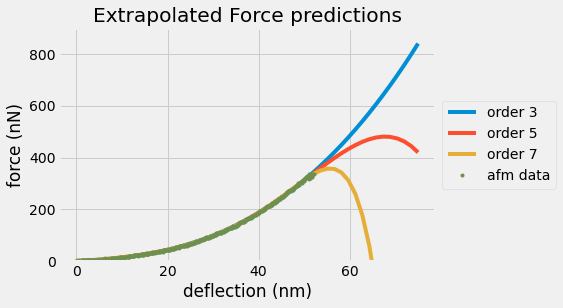

In [14]:
d_ext=np.linspace(0,75)
Z_ext=np.block([[d_ext**0],[d_ext**1]]).T
Z=np.block([[d**0],[d**1]]).T
max_N=8
for i in range(2,max_N+1):
    Z=np.hstack((Z,d.reshape(-1,1)**i))
    Z_ext=np.hstack((Z_ext,d_ext.reshape(-1,1)**i))
    A = np.linalg.solve(Z.T@Z,Z.T@F)
    if i==3 or i==5 or i==7:# or i==20: 
        plt.plot(d_ext,Z_ext@A,label='order {:d}'.format(i))

plt.plot(d,F,'.',label='afm data')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title('Extrapolated Force predictions')
plt.xlabel('deflection (nm)')
plt.ylabel('force (nN)')
plt.ylim((0,900));

The extrapolated results are much less promising than the __training__ and __testing__ data predictions. It would be very odd for the force to start to decrease at 70 nm or 58 nm of deflection. All three polynomials seem to capture the testing and training data, but extrapolation should be done with the lower order polynomials. 

### Exercise

Use the `../data/xy_data.csv` data set to create polynomial fits from order 1-7. Divide the data into 70% __training__ data and 30% __testing__ data. Plot the total error in the __training__ and __testing__ predictions from your model and plot the order 7 polynomial fit.

In [15]:
xy_data = np.loadtxt('../data/xy_data.csv',delimiter=',')
x=xy_data[:,0];
y=xy_data[:,1];

### Beyond polynomials

Linear Regression is only limited by the ability to separate the parameters from the function to achieve

$\mathbf{y}=[\mathbf{Z}]\mathbf{a}$

$\mathbf{Z}$ can be any function of the independent variable(s). 

**Example**:
Let's take some voltage-vs-time data that you know has two frequency components, $\sin(t)$ and $\sin(3t)$. You want to know what amplitudes are associated with each signal. 

$\mathbf{V}_{measured}=[\sin(t) \sin(3t)][amp_{1t},~amp_{3t}]^T$

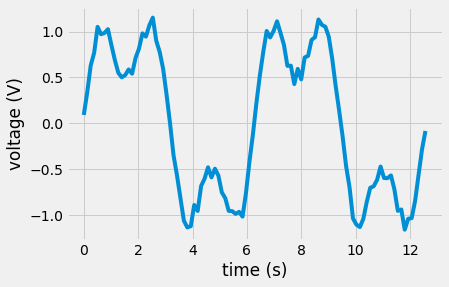

In [16]:
sin_data = np.loadtxt('../data/sin_data.csv')
t = sin_data[0,:];
V = sin_data[1,:];
plt.plot(t,V)
plt.xlabel('time (s)')
plt.ylabel('voltage (V)');

In [17]:
Z = np.block([[np.sin(t)],[np.sin(3*t)]]).T
amps = np.linalg.solve(Z.T@Z,Z.T@V)

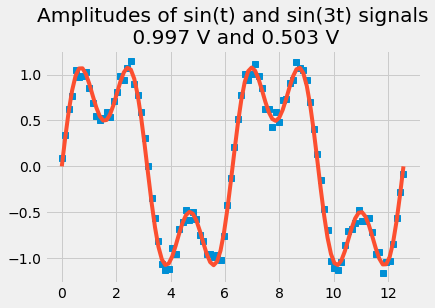

In [18]:
plt.plot(t, V, 's')
plt.plot(t, Z@amps)
plt.title('Amplitudes of sin(t) and sin(3t) signals\n {:.3f} V and {:.3f} V'.format(*amps));

## Fitting the Global Temperature Anomolies again

Now, you have the right tools to fit our Global temperature anomolies properly. Let's create a function with three constants

$f(t)= A\cdot t+B+ C\cdot H(t-1970)(t)$

Where, $A$ is the slope from time 1880-1970, B is the intercept (extrapolated temp anomoly at 0 A.D.), and C is the increase in slope after 1970, activated with a heaviside function, $H(t-1970)$. Our regression is still linear because each constant can be pulled out of our function to form $\mathbf{Z}$. 

$\mathbf{Temp} = [t~~t^0~~(t-1970)\cdot H(t-1970)][A,~B,~C]^T$

In [19]:
fname = '../data/land_global_temperature_anomaly-1880-2016.csv'

temp_data = pd.read_csv(fname,skiprows=4)

t = temp_data['Year'].values
T = temp_data['Value'].values

Z= np.block([[t],[t**0],[(t-1970)*(t>=1970)]]).T

print('This is every 10th row of Z')
print('---------------------------')
print(Z[::10])

This is every 10th row of Z
---------------------------
[[1880    1    0]
 [1890    1    0]
 [1900    1    0]
 [1910    1    0]
 [1920    1    0]
 [1930    1    0]
 [1940    1    0]
 [1950    1    0]
 [1960    1    0]
 [1970    1    0]
 [1980    1   10]
 [1990    1   20]
 [2000    1   30]
 [2010    1   40]]


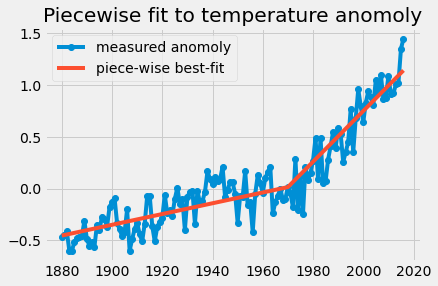

In [20]:
fit = np.linalg.solve(Z.T@Z,Z.T@T)
#print(Z)

plt.plot(t,T,'o-',label='measured anomoly')
plt.plot(t,Z@fit,label='piece-wise best-fit')
plt.title('Piecewise fit to temperature anomoly')
plt.legend();

## What You've Learned

* How to use the _general least squares regression_ method for almost any function
* How to calculate the coefficient of determination and correlation coefficient for a general least squares regression, $r^2~ and~ r$
* How to plot and read a __training-testing__ plot
* How to divide data into __training__ and __testing__ data for analysis
* Why you need to avoid __overfitting__
* How to construct general least squares regression using the dependent and independent data to form $\mathbf{y}=\mathbf{Za}$. 
* How to construct a piecewise linear regression 

## References

1. [Numpy polyfit documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)

2. [Cooper _et. al_ 2014. Nonlinear Elastic Constants of $MoS_2$. _Phys. Rev. B_ 2013.](https://pdfs.semanticscholar.org/68c4/0c4eef562e2ac785fb7b4bcd6ee8229f2424.pdf)

3. [Figueroa _et al._ Stress Relaxation and Creep Recovery Tests Performed on Wheat Kernels Versus Doughs: Influence of Glutenins on Rheological and Quality Properties. ](https://www.cerealsgrains.org/publications/plexus/cfw/pastissues/2013/Documents/CFW-58-3-0139.pdf)

4. Chapra, Steven _Applied Numerical Methods with Matlab for Engineers._ __ch 14.__ McGraw Hill.

5. [Koerson, William. Overfitting vs. Underfitting: A Complete Example](https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765)

# Problems

1. One suggestion that came up for the temperature anomoly plot was to use a quadratic, curbic, or higher order function when you first tried fitting piecewise lines to the data in [CompMech02-03_Linear_Regression_with_Real_Data.ipynb](https://github.uconn.edu/rcc02007/CompMech02-Analyze-data/blob/master/notebooks/03_Linear_Regression_with_Real_Data.ipynb). Let's try fitting higher order polynomials to the temperature anomoly data. You can create the __training-testing__ curve to see what order polynomial is capturing the most data without overfitting to noise in the measurements. 

a. Divide the data into 70% __training__ and 30% __testing__ data sets

b. Create the $\mathbf{Z}_{train}~and~\mathbf{Z}_{test}$-matrices for the training and testing data for a first order fit

c. Calculate the constants $\mathbf{a}$ using the __training__ $\mathbf{Z}_{train}$ data

d. Sum the squared difference between the predicted anomoly and the measured anomoly. 

e. Repeat b-d for orders 2,3,4,...,10

f. Plot the error in __testing-training__ error vs the order of the polynomial fit

<img src="../images/prony-series.png" style="width: 300px;"/> <img src="../images/stress_relax_wheat.png" style="width: 400px;"/> 

Viscoelastic Prony series model and stress-vs-time relaxation curve of wheat kernels [[3]](https://www.cerealsgrains.org/publications/plexus/cfw/pastissues/2013/Documents/CFW-58-3-0139.pdf). Stress relaxation curve of a wheat kernel from regressed equation data that illustrate where to locate relaxation times (vertical dotted lines) and stresses (horizontal black marks). $\sigma$ = stress; t = time.

2. [Viscoelasticity](https://en.wikipedia.org/wiki/Viscoelasticity) is a property of materials that exhibit stiffness, but also tend to flow slowly. One example is [Silly Putty](https://en.wikipedia.org/wiki/Silly_Putty), when you throw a lump it bounces, but if you leave it on a table it _creeps_, slowly flowing downwards. In the stress-vs-time plot above, a wheat kernel was placed under constant strain and the stress was recorded. In a purely elastic material, the stress would be constant. In a purely viscous material, the stress would decay to 0 MPa. 

Here, you have a viscoelastic material, so there is some residual elastic stress as $t\rightarrow \infty$. The researchers used a 4-part [Prony series](https://en.wikipedia.org/wiki/Prony%27s_method) to model viscoelasticity. The function they fit was

$\sigma(t) = a_1 e^{-t/1.78}+a_2 e^{-t/11}+a_3e^{-t/53}+a_4e^{-t/411}+a_5$

a. Load the data from the graph shown above in the file `../data/stress_relax.dat`. 

b. Create a $\mathbf{Z}$-matrix to perform the least-squares regression for the given Prony series equation $\mathbf{y} = \mathbf{Za}$.

c. Solve for the constants, $a_1,~a_2,~a_3,~a_4~,a_5$

d. Plot the best-fit function and the data from `../data/stress_relax.dat` _Use at least 50 points in time to get a smooth best-fit line._

3. Load the '../data/primary-energy-consumption-by-region.csv' that has the energy consumption of different regions of the world from 1965 until 2018 [Our world in Data](https://ourworldindata.org/energy). 
You are going to compare the energy consumption of the United States to all of Europe. Load the data into a pandas dataframe. *Note: you can get certain rows of the data frame by specifying what you're looking for e.g. 
`EUR = dataframe[dataframe['Entity']=='Europe']` will give us all the rows from Europe's energy consumption.*

a. Use a piecewise least-squares regression to find a function for the energy consumption as a function of year

energy consumed = $f(t) = At+B+C(t-1970)H(t-1970)$

c. What is your prediction for US energy use in 2025? How about European energy use in 2025?